<a href="https://colab.research.google.com/github/Latamila/Latamila/blob/main/isolationforestFraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


In [2]:
!pip install -U -q threadpoolctl

In [3]:
import sklearn

In [4]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
import warnings
warnings.filterwarnings('ignore')

In [5]:
%reload_ext watermark

In [6]:
%watermark -a 'Data Science Academy' --iversions

Author: Data Science Academy

scipy     : 1.11.3
sklearn   : 1.2.2
seaborn   : 0.12.2
numpy     : 1.23.5
matplotlib: 3.7.1



In [7]:
from google.colab import files

In [8]:
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('creditcard.csv')

In [ ]:
fii = pd.read_excel('creditcardexcel.xlsx')

In [ ]:
uploaded = files.upload()

In [15]:
df.shape

(284807, 31)

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.isnull().sum().max()

0

Text(0, 0.5, 'Frequencia')

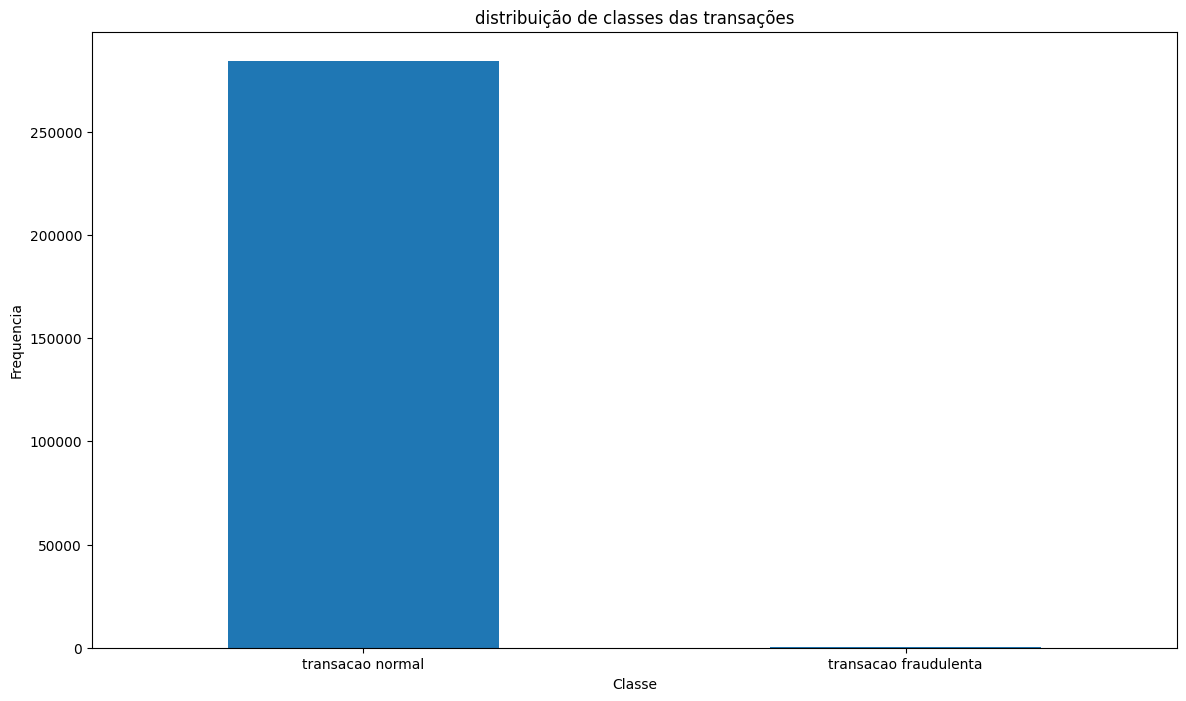

In [20]:
#plot
#0 significa transacao normal
#1 significa transacao fraudulenta
LABELS = ['transacao normal', 'transacao fraudulenta']
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('distribuição de classes das transações')
plt.xticks(range(2), LABELS)
plt.xlabel('Classe')
plt.ylabel('Frequencia')

In [21]:
fraude = df[df['Class']==1]

In [22]:
normal = df[df['Class']==0]

In [23]:
print(fraude.shape, normal.shape)

(492, 31) (284315, 31)


In [26]:
#em valor percentual
print('transações normal', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% dos dados')
print('transações fraudulentas', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% dos dados')

transações normal 99.83 % dos dados
transações fraudulentas 0.17 % dos dados


In [27]:
#resumo estatistico das transações fraudulentas
fraude.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

a partir desta tavelaa, podemos verificar que o valor minimo para transacoes fraudulentas foi de 0,000 e o valor maximo foi de 2.125,87 delares. a media de transações fraudulentas foi de $122,21 e as transações fraudulentas ocorreram cerca de 492 vezes.

In [28]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

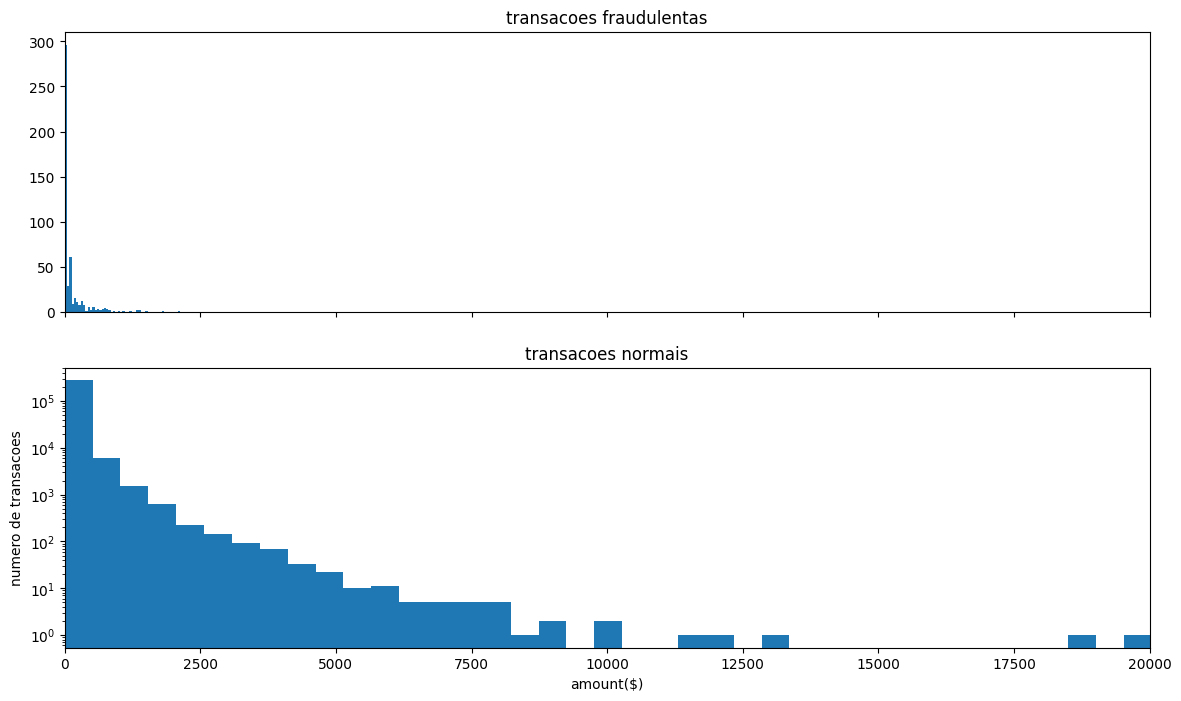

In [31]:

#histogram

f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
bins = 50
ax1.hist(fraude.Amount, bins = bins)
ax1.set_title('transacoes fraudulentas')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('transacoes normais')
plt.xlabel('amount($)')
plt.ylabel('numero de transacoes')
plt.xlim(0, 20000)
plt.yscale('log')
plt.show();

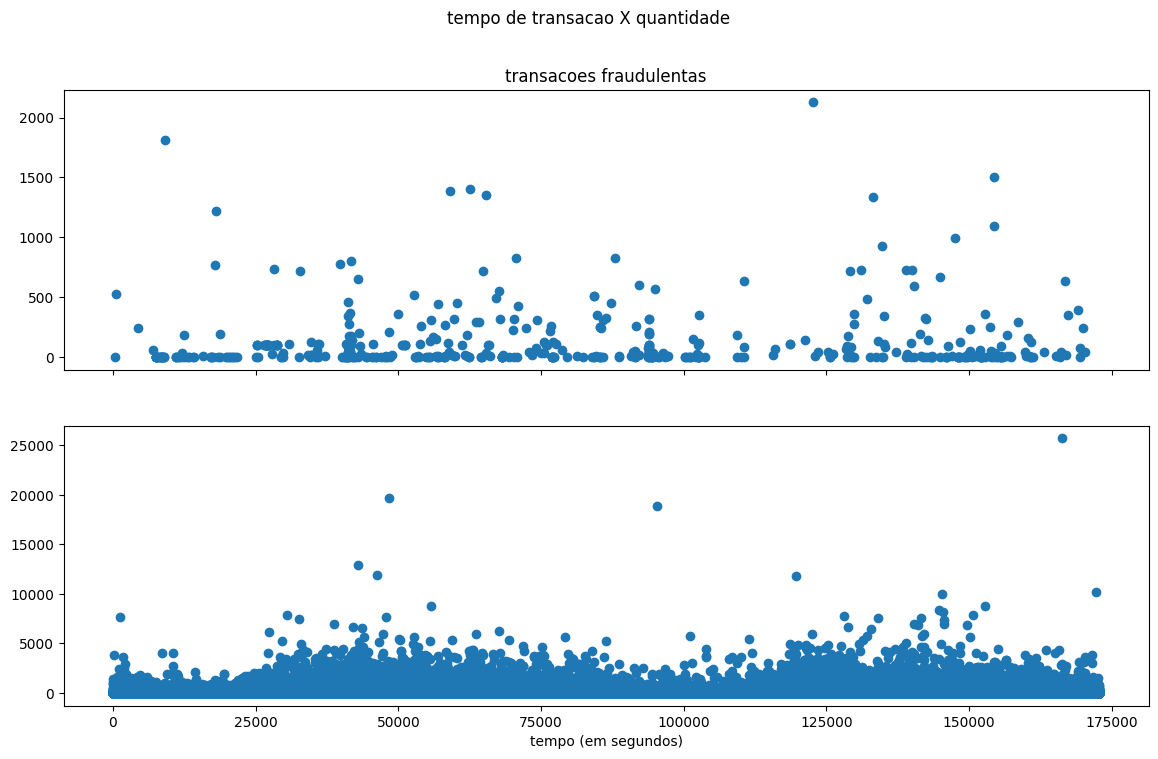

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('tempo de transacao X quantidade')
ax1.scatter(fraude.Time, fraude.Amount)
ax1.set_title('transacoes fraudulentas')
ax2.scatter(normal.Time, normal.Amount)
plt.xlabel('tempo (em segundos)')
plt.show()

In [35]:
amostra = df.sample(frac = 0.1, random_state = 1)

In [36]:
amostra.shape

(28481, 31)

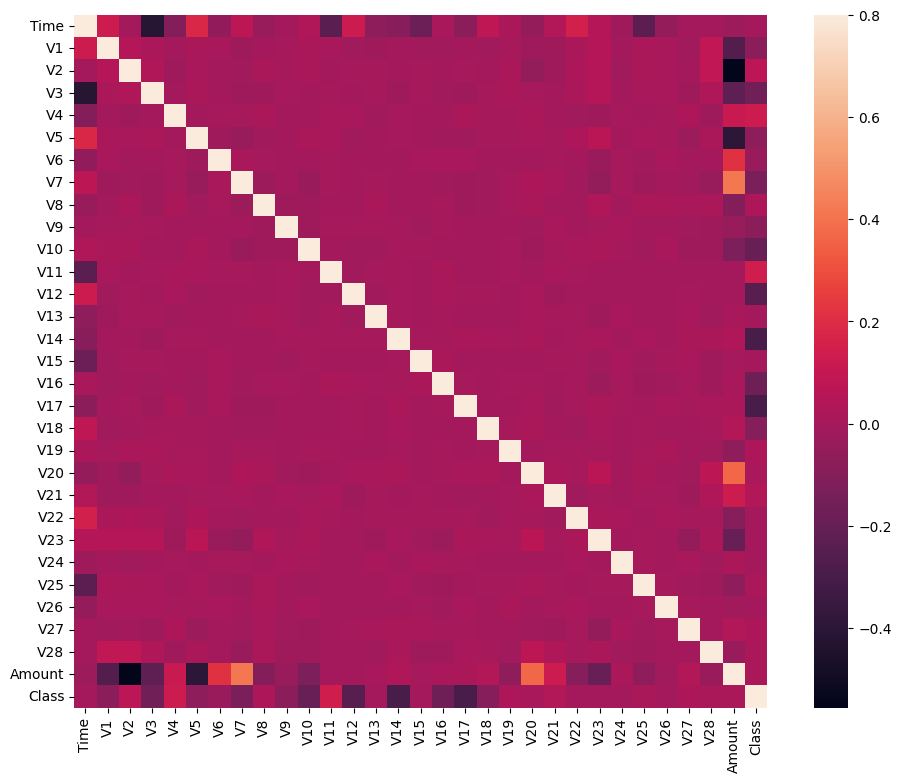

In [39]:
#matriz de correlação para a amostra
correlation_matriz = amostra.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(correlation_matriz, vmax = 0.8, square = True)
plt.show()

In [41]:
#determinamos o numero de fraudes e transações validas na amostra de dados
fraude = amostra[amostra['Class']==1]
valid = amostra[amostra['Class']==0]

In [42]:
#fraudes são outliers, vamos calcular a proporção e usar isso mais tarde nos modelos
outlier_fraction = len(fraude)/float(len(valid))

In [43]:
#imprime a fração e o numero de casos de fraude e transação valida
print('\ncasos fraudulentos : {}'.format(len(fraude)))
print('\ncasos validos : {}'.format(len(valid)))
print('\npercentual de transações anormais(fraudulentas): ', outlier_fraction)


casos fraudulentos : 49

casos validos : 28432

percentual de transações anormais(fraudulentas):  0.0017234102419808666


In [44]:
columns = amostra.columns.tolist()

In [48]:
columns = [c for c in columns if c not in ['Class']]

In [49]:
#define a variavel target
target = 'Class'

In [50]:
#define um random state
state = np.random.RandomState(42)

In [51]:
#define x e y
X = amostra[columns]
Y = amostra[target]

In [52]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


ISOLATION FOREST ALGORITM

O isolation forest algorithm é um algoritmo de maquina não supervisionado que é usado principalmente para detecção de anomalias. ele se baseia na ideia de que as anomalias sao poucas e diferentes dos dados normais, portanto, são mais faceis de isolar. leia a descrição completa do algoritmo no capitulo 6 do curso.

local outlier factor (LOF) ALGORITHM

o local outlier factor(lof) é um algoritmo de aprendizado de maquina nao supervisionado usado para identificar pontos de dados anomalos, tambem conhecidos como outliers, em um coonjunto de dados. o lof baseia-se na ideia de que os pontos de dados normais tendem a estar proximos uns dos outros em um espaço de atributos, enquanto oso outliers estão mais distantes dos pontos de dados normais. o algoritmo estima a densidade local de cada ponto e compara com a densidade dos seus vizinhos para identificar outliers.

O isolation forest é um algoritmo de aprendizado de maquina nao supervisionado que é usado principalmente para detecção de anomalias. ele se baseia na ideia de que as anomalias são poucas e diferentes dos dados normais, portanto são mais faceis de isolar.

o algoritmo cria varias arvores isoladas, cada uma construida a partir de uma amostra aleatória do conjunto de dados original.

o comprimento medio do caminho (numero de divisoes) necessário para isolar cada ponto de dados nas varias arvores é calculado. pontos de dados anomalos geralmente requerem menos divisões para serem isolados, pois sao menos comuns e diferentes dos pontos normais.

o algoritmo calcula um score de anomalia para cada ponto de dados com base no comprimento medio do caminho. pontos de dados com menor comprimento medio do caminho sao considerados mais anomalos. esse score é normalizado para um valor entre 0 e 1, onde 1 indica uma anomalia perfeita e 0 indica um ponto de dados completamente normal.

um limiar é definido para classificar os pontos de dados como anomalias ou normais. pontos de dados com scores de anomalia acima do limiar são classificados como anomalias, enquanto os pontos de dados com scores abaixo do limiar sao considerados normais.

o isolation forest é eficiente e eficaz na detecção de anomalias em grandes conjuntos de dados e é capaz de lidar com ruido e outliers. além disso, o algoritmo é menos suscetível à 'maldição de dimensionalidade' em comparação com outras tecnicas de detecção de anomalias.




o local outlier factor (LOF) é um algoritmo de aprendizado de maquina nao supervisionado usado para identificar pontos de dados anomalos, tambem conhecidos como outliers, em um conjunto de dados.

o LOF baseia-se na ideia de que os pontos de dados normais tendem a estar proximos uns dos outros em um espaço de atributos, enquanto os outliers estão mais distantes dos pontos de dados normais. o algoritmo estima a densidade local de cada ponto e compara com a densidade dos seus vizinhos para identificar outliers.

o algoritmo começa calculando as distancias entre todos os pontos de dados no conjunto de dados.
para cada ponto de dados, o algoritmo identifica seus k-vizinhos mais proximos, ou seja, os k pontos com as menores distancias ate o ponto em questao.

para cada ponto de dados, o algoritmo calcula a densidade local alcançavel. essa medida de densidade é baseada na distancia media entre o ponto de dados e seus k vizinhos mais proximos. o valor é inversamente proporcional à distancia media, ou seja, pontos com densidades locais alcançaveis maiores estao mais proximos de seus vizinhos.

o LOF é calculado como a razao entre a densidade local alcançavel media dos k-vizinhos mais proximos de um ponto e a densidade local alcançavel desse ponto. um valor LOF maior que 1 indica que um ponto de dados tem uma densidade local alcançavel menor que a media de seus vizinhos e, portanto, pode ser considerado um outlier. valores proximos a 1 indicam pontos de dados normais, enquanto valores significativamente maiores que 1 sugerem a presença de outliers.

com base nos valores de LOF calculados, os pontos de dados sao classificados como normais ou outliers. um limiar pode ser definido para determinar se um ponto de dados deve ser considerado um outlier com base em seu LOF. pontos de daods com LOF acima do limiar sao classificados como outliers, enquanto aqueles abaixo do limiar sao considerados normais.

o algoritmo LOF é eficaz na detecção de outliers em conjuntos de dados com agrupamentos e densidades variaveis. ele também é robusto a ruidos e pode lidar com diferentes escalas de caracteristicas. no entanto, o LOF pode ter um desempenho mais lento em grandes conjuntos de dados, ja que requer o calculo de distancias entre todos os pontos de dados e a identificação dos k vizinhos mais proximos .

In [53]:
#modelos de detecção de outliers
classificadores = {
    'isolation forest': IsolationForest(n_estimators = 100,
                                        max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state,
                                        verbose = 0),

    'local outlier factor': LocalOutlierFactor(n_neighbors = 10,
                                               algorithm = 'auto',
                                               leaf_size = 30,
                                               metric = 'minkowski',
                                               p = 2,
                                               metric_params = None,
                                               contamination = outlier_fraction)
}

In [55]:
#looop de treino
for i, (clf_name, clf) in enumerate(classificadores.items()):
  #fit
  if clf_name == 'local outlier factor':
    #faz previsao com o modelo
    y_pred = clf.fit_predict(X)
    #calcula o score
    scores_prediction = clf.negative_outlier_factor_
    #salva o modelo
    modelo_lof = clf
  else:
    #fit
    clf.fit(X)
    #score
    scores_prediction = clf.decision_function(X)
    #previsao
    y_pred = clf.predict(X)
    #salva o modelo
    modelo_if = clf

  #reshape dos valores das previsoes para 0 (transacoes validas)
  # e 1 (transaçoes fraudulentas)
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1
  n_errors = (y_pred != Y).sum()

  #metricas
  print('{}'.format(clf_name))
  print('\nAccuracy Score: ', accuracy_score(Y,y_pred))
  print('\nClassification Report: ')
  print(classification_report(Y,y_pred))

isolation forest

Accuracy Score:  0.9972964432428637

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.22      0.22      0.22        49

    accuracy                           1.00     28481
   macro avg       0.61      0.61      0.61     28481
weighted avg       1.00      1.00      1.00     28481

local outlier factor

Accuracy Score:  0.9965942207085425

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



In [63]:
#dados de uma nova transação
nova_transacao_1 = [911,-0.7684413694567017,0.410690439390815,1.88716550025953,1.99865410868397,-0.705465722839156,0.99,1.98,1.52,-145.3,911,-0.7684413694567017,0.410690439390815,1.88716550025953,1.99865410868397,-0.705465722839156,0.99,1.98,1.52,-145.3,911,-0.7684413694567017,0.410690439390815,1.88716550025953,1.99865410868397,-0.705465722839156,0.99,1.98,1.52,42.56123]

In [64]:
nova_transacao_arr_1 = np.array(nova_transacao_1).reshape(1,-1)

In [65]:
previsao_1 = modelo_if.predict(nova_transacao_arr_1)

In [66]:
previsao_1[previsao_1 == 1] = 0
previsao_1[previsao_1 == -1] = 1

In [67]:
if previsao_1 == 0:
  print('Essa transação nao é tentativa de fraude')
else:
  print('Essa transação é, provavelmente, tentativa de fraude')

Essa transação é, provavelmente, tentativa de fraude
